In [1]:
from PIL import Image
import numpy as np

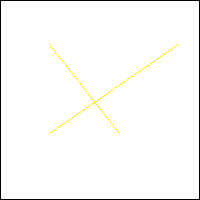

In [8]:
img = Image.open('assets/bnw.png')
img

In [9]:
img.size

(200, 200)

In [10]:
# get flattened image pixel data
raw_img_data = list(img.getdata())

# organise pixels into 2d list
img_data = [[raw_img_data[x + y*img.width] for y in range(img.height)] for x in range(img.width)]


In [11]:
class Grid:
    def __init__(self, table):
        self.table = table

    def __repr__(self):
        return self.table

    def first_row(self, step):
        data = self.table.pop(0)
        return data[::step]

    def last_row(self, step):
        data = self.table.pop(-1)
        return data[::step]

    def first_column(self, step):
        data = [self.table[i].pop(0)for i in range(len(self.table))]
        return data[::step]

    def last_column(self, step):
        data = [self.table[i].pop(-1)for i in range(len(self.table))]
        return data[::step]

    def done(self):
        return [j for i in self.table for j in i] == []

In [12]:
def spiral(list_data):
    data = Grid(list_data.copy())
    movement = 0
    move_options = {
        0: data.first_row,
        1: data.last_column,
        2: data.last_row,
        3: data.first_column
    }
    spiral = []
    while True:
        try:
            spiral.extend(move_options.get(movement % 4)
                          (1 if (movement % 4) < 2 else -1))
            movement += 1
        except IndexError:
            if data.done():
                break
    return spiral
spiral_img_data = spiral(img_data)

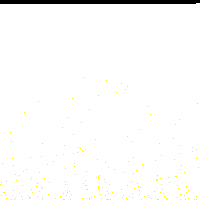

In [13]:
new_img = Image.new('RGB', img.size, (0, 0, 0))
pixels = new_img.load()

for x in range(new_img.width):
    for y in range(new_img.height):
        pixels[x,y] = spiral_img_data[x+y*new_img.width]
new_img.save('assets/hmm.png', quality=95, subsampling=0)
new_img